# Solution - 1

(a).



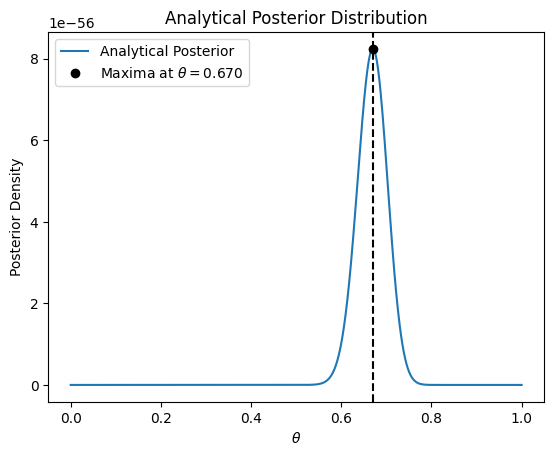


(b).



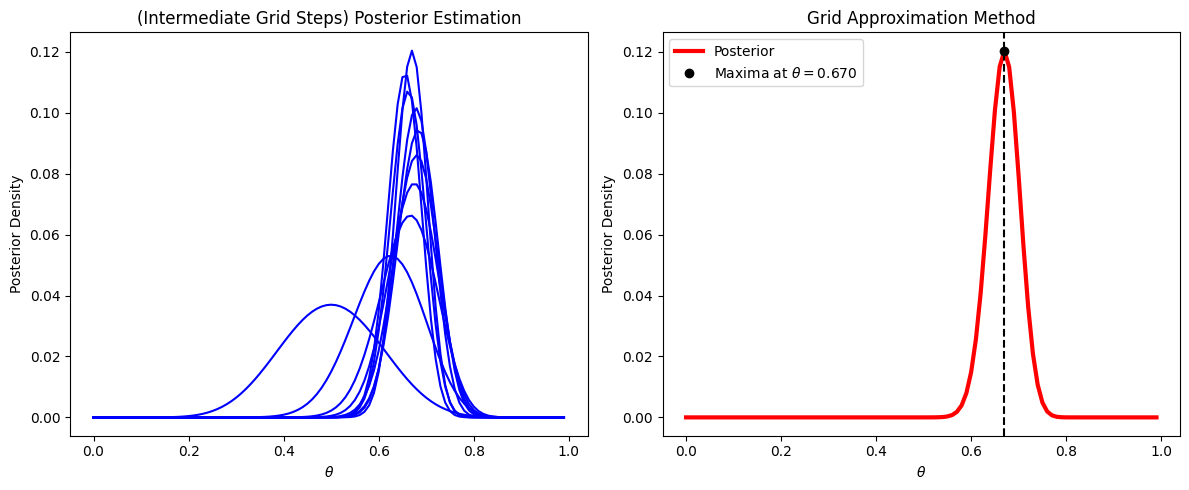


(c).

Marginal Likelihood =  1.4036789169490992e-10

(d).



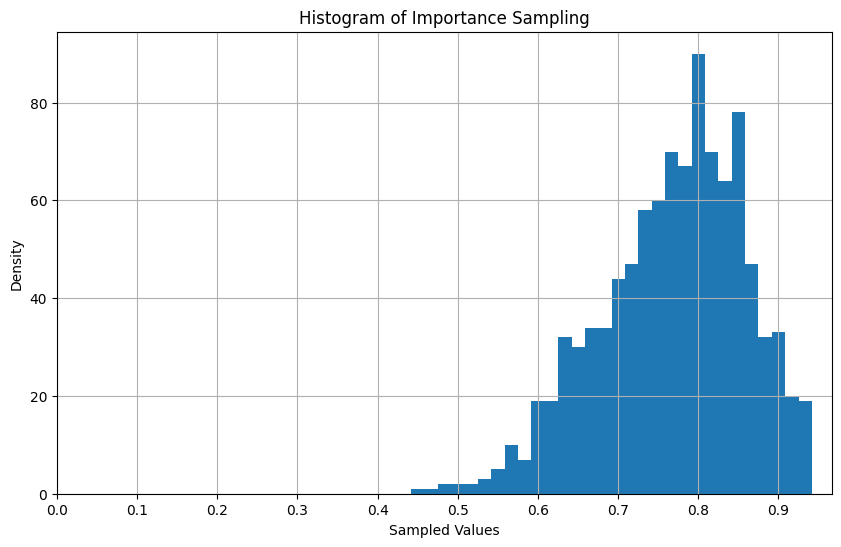


(e).



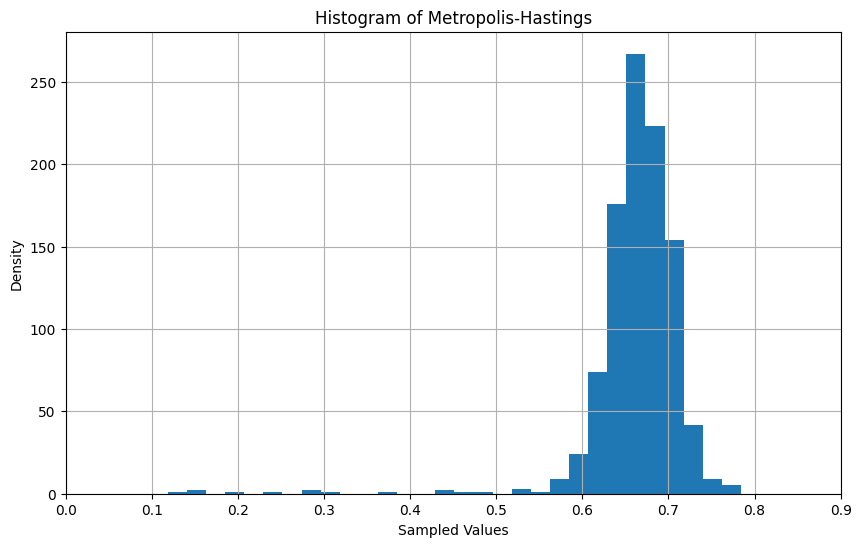



Rejections rate= 51.1

(f).



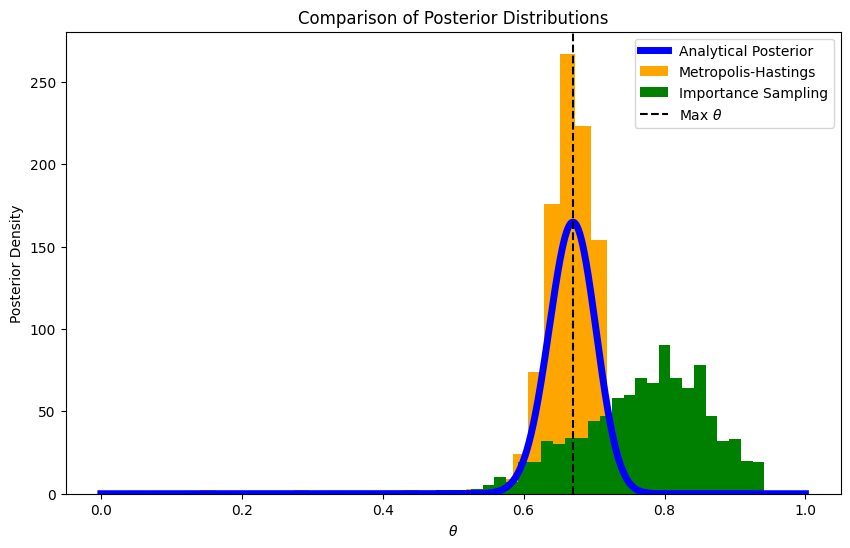


 Here, I have scaled Analytical Posterior for better analysis of the graphs.

Following observation ca be made from the graph-
(1). Metropolis-Hastings Method fits better to the Analytical Method.
(2). Maxima for Metropolis-Hastings Method and Analytical Method are nearly the same.
(3). Importance Sampling fits less to both of the other methods.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import factorial
from scipy.stats import norm
import seaborn as sns

experiment = [10, 15, 15, 14, 14, 14, 13, 11, 12, 16]
samples = 10
N = 20

def posterior_estimation(theta, alpha, beta):
  return (theta ** (alpha - 1)) * ((1 - theta) ** (beta - 1))

def likelihood_estimation(theta, N, e):
  return ((theta ** e) * ((1 - theta) ** (N - e)))*(factorial(N)/(factorial(e)*factorial(N - e)))

print("(a).\n")

theta_samples = np.linspace(0,1, 1000)

y_posterior_analytical = [posterior_estimation(theta, 135, 67) for theta in theta_samples]

max_idx = np.argmax(y_posterior_analytical)
theta_max = theta_samples[max_idx]
pdf_max = y_posterior_analytical[max_idx]

plt.plot(theta_samples, y_posterior_analytical, label="Analytical Posterior")
plt.plot(theta_max, pdf_max, 'ok', label=f'Maxima at $\\theta={theta_max:.3f}$')
plt.axvline(x=theta_max, color='k', linestyle='--')
plt.xlabel("$\\theta$")
plt.ylabel("Posterior Density")
plt.title("Analytical Posterior Distribution")
plt.legend()
plt.show()

print("\n(b).\n")

lower_bound = 0.
upper_bound = 1.
samples_ = 100

grid_samples = [lower_bound + ((upper_bound - lower_bound)*i)/samples_ for i in range(samples_)]

y_likelihood = np.ones(samples_)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for e in experiment:
  for i in range(samples_):
    y_likelihood[i] *= likelihood_estimation(grid_samples[i], N, e)
  y_post_i = y_likelihood/(np.sum(y_likelihood))
  ax[0].plot(grid_samples, y_post_i, color = 'b', label = None)

ax[0].set_xlabel("$\\theta$")
ax[0].set_ylabel("Posterior Density")
ax[0].set_title("(Intermediate Grid Steps) Posterior Estimation")

# Since, prior = Beta(1, 1), which is uniform and = 1.

Approx_ML = np.sum(y_likelihood*1)

y_posterior_grid = y_likelihood/Approx_ML

max_idx = np.argmax(y_posterior_grid)
theta_max = grid_samples[max_idx]
pdf_max = y_posterior_grid[max_idx]

ax[1].plot(grid_samples, y_posterior_grid, color = 'r', linestyle = 'solid', linewidth = 3, label="Posterior")
ax[1].plot(theta_max, pdf_max, 'ok', label=f'Maxima at $\\theta={theta_max:.3f}$')
ax[1].axvline(x=theta_max, color='k', linestyle='--')
ax[1].set_xlabel("$\\theta$")
ax[1].set_ylabel("Posterior Density")
ax[1].set_title("Grid Approximation Method")
ax[1].legend()

plt.tight_layout()
plt.show()

print("\n(c).\n")

theta_samples = np.random.beta(1, 1, 100000)
y_likelihood = np.ones(100000)

for e in experiment:
  for i in range(100000):
    y_likelihood[i] *= likelihood_estimation(theta_samples[i], N, e)

ML = np.mean(y_likelihood)

print(f"Marginal Likelihood = ", ML)

print("\n(d).\n")

# Proposal Distribution = Normal+(0.,1.) => Since, theta 'belongs to' [0, 1] only.

n = 4000
theta_samples= abs(np.random.normal(0.,1., n))

DF = pd.DataFrame(columns = ['theta', 'weight'], index= range(n))

for e in experiment:
  for i in range(n):
    DF.loc[i, 'theta'] = theta_samples[i]
    DF.loc[i, 'weight'] = (likelihood_estimation(theta_samples[i], N, e)*(theta_samples[i] <= 1.))/norm.pdf(theta_samples[i], 0., 1.)

y_posterior_imp = np.random.choice(DF['theta'],size = n//4, p = DF['weight']/np.sum(DF['weight']))

plt.figure(figsize=(10, 6))
plt.hist(y_posterior_imp, bins=30, label = 'density')
plt.title("Histogram of Importance Sampling")
plt.xlabel("Sampled Values")
plt.ylabel("Density")
plt.grid(True)
plt.xticks(np.arange(0., 1., 0.1))
plt.show()

print("\n(e).\n")

num_samples = 1000

theta_samples = np.zeros(num_samples)
theta_samples[0] = np.random.beta(1, 1)
prev_post = 0.

for e in experiment:
  prev_post = prev_post + np.log(likelihood_estimation(theta_samples[0], N, e))

i = 1
step = 0.04
reject = 0

while i < num_samples:
  proposed_theta = np.random.normal(theta_samples[i-1], step)
  if(0. <= proposed_theta <= 1.):
    proposed_posterior = 0.
    for e in experiment:
      proposed_posterior = proposed_posterior + np.log(likelihood_estimation(proposed_theta, N , e))
    h_r = proposed_posterior - prev_post
    hastings_ratio = np.exp(h_r)
    p_str = min(1, hastings_ratio)
    if(np.random.uniform(0, 1, 1) < p_str):
      theta_samples[i] = proposed_theta
      prev_post = proposed_posterior
      i += 1
    else:
      reject += 1
  else:
    reject += 1

plt.figure(figsize=(10, 6))
plt.hist(theta_samples, bins=30, label = 'density')
plt.title("Histogram of Metropolis-Hastings")
plt.xlabel("Sampled Values")
plt.ylabel("Density")
plt.grid(True)
plt.xticks(np.arange(0., 1., 0.1))
plt.show()

print("\n")
print(f"Rejections rate= {(reject/num_samples)*100}")

y_posterior_mc = theta_samples

print("\n(f).\n")

theta_samples = np.linspace(0, 1, 1000)

y_posterior_analytical_scaled = [posterior_estimation(theta, 135, 67)*(2*(1e+57)) for theta in theta_samples]

plt.figure(figsize=(10, 6))
plt.plot(theta_samples, y_posterior_analytical_scaled, label="Analytical Posterior", linewidth = 5, color = 'b')
plt.hist(y_posterior_mc, color = 'orange', bins=30, label="Metropolis-Hastings")
plt.hist(y_posterior_imp, color = 'g', bins=30, label="Importance Sampling")
plt.axvline(x=theta_max, color='k', linestyle='--', label= "Max $\\theta$")
plt.xlabel("$\\theta$")
plt.ylabel("Posterior Density")
plt.title("Comparison of Posterior Distributions")
plt.legend()
plt.show()

print("\n Here, I have scaled Analytical Posterior for better analysis of the graphs.")
print("\nFollowing observation ca be made from the graph-")
print("(1). Metropolis-Hastings Method fits better to the Analytical Method.")
print("(2). Maxima for Metropolis-Hastings Method and Analytical Method are nearly the same.")
print("(3). Importance Sampling fits less to both of the other methods.")

# Solution - 2

(2.5.1).

Rejections rate= 52.725




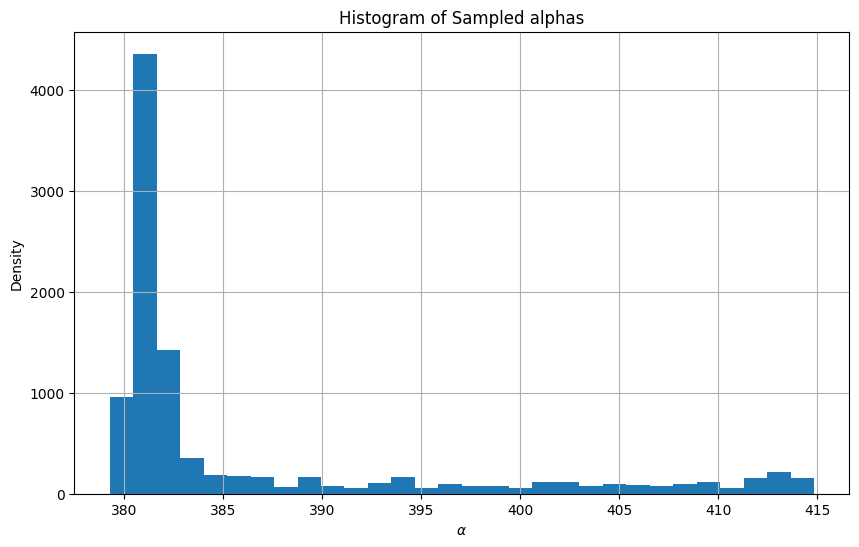

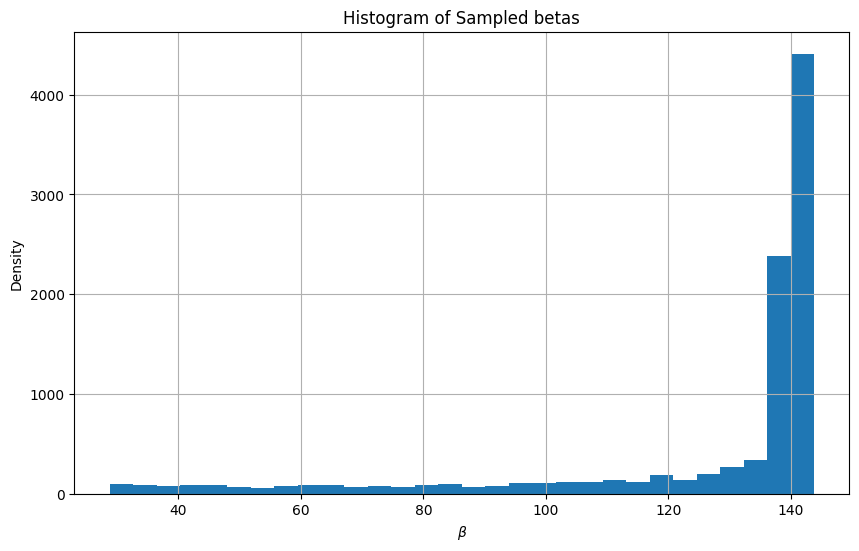


(2.5.2).

95% credible interval for alpha: [380.01931829 402.44189694]
95% credible interval for beta: [ 86.64177304 142.7755525 ]




In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import factorial
from scipy.stats import norm

url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Data/word-recognition-times.csv"

dat = pd.read_csv(url)
# print(dat.head())
# print(dat.shape[0])

n = 4000
sigma_post = 30.

def posterior_estimation(dat, alpha, beta):
  type_i = (dat['type'] == 'non-word').astype(float)
  mu = alpha + type_i*beta
  post = norm.logpdf(dat['RT'], mu, sigma_post) + norm.logpdf(alpha, 400, 50) + (type_i)*abs(norm.logpdf(beta, 0, 50))
  post = np.sum(post)
  return post

print("(2.5.1).\n")

i = 1
step = 0.08
reject = 0
num_samples = 10000

alpha_samples = np.zeros(num_samples)
beta_samples = np.zeros(num_samples)

alpha_samples[0] = np.random.normal(400, 50)
beta_samples[0] = abs(np.random.normal(0, 50))

prev_post = posterior_estimation(dat, alpha_samples[0], beta_samples[0])

while i < num_samples:
  proposed_alpha = np.random.normal(alpha_samples[i-1], step)
  proposed_beta = abs(np.random.normal(beta_samples[i-1], step))
  post_new = posterior_estimation(dat, proposed_alpha, proposed_beta)
  h_r = post_new - prev_post
  hastings_ratio = np.exp(h_r)
  p_str = min(1, hastings_ratio)
  if(np.random.uniform(0, 1) < p_str):
    alpha_samples[i] = proposed_alpha
    beta_samples[i] = proposed_beta
    prev_post = post_new
    i += 1
  else:
    reject += 1

print(f"Rejections rate= {(reject/n)*100}")
print("\n")

plt.figure(figsize=(10, 6))
plt.hist(alpha_samples, bins=30, label = 'alpha')
plt.title("Histogram of Sampled alphas")
plt.xlabel("$\\alpha$")
plt.ylabel("Density")
plt.grid(True)
plt.show()

print("\n")

plt.figure(figsize=(10, 6))
plt.hist(beta_samples, bins=30, label = 'beta')
plt.title("Histogram of Sampled betas")
plt.xlabel("$\\beta$")
plt.ylabel("Density")
plt.grid(True)
plt.show()

print("\n(2.5.2).\n")

burn = 1000
alpha_samples = alpha_samples[burn:]
beta_samples = beta_samples[burn:]

alpha_cred_interval = np.percentile(alpha_samples, [2.5, 97.5])
beta_cred_interval = np.percentile(beta_samples, [2.5, 97.5])

print(f"95% credible interval for alpha: {alpha_cred_interval}")
print(f"95% credible interval for beta: {beta_cred_interval}")
print("\n")

Exercise (2.1).



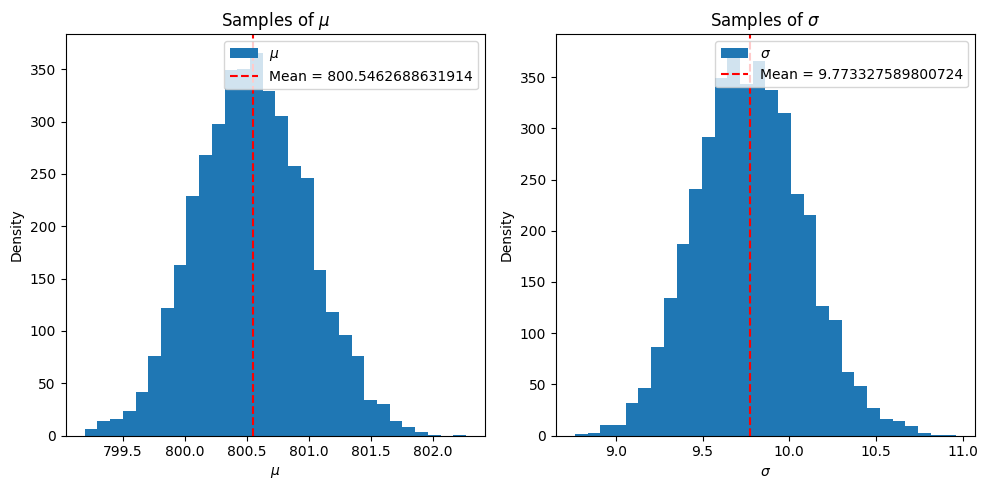


Exercise (2.2).

Posterior Distribution for nsamp = 100



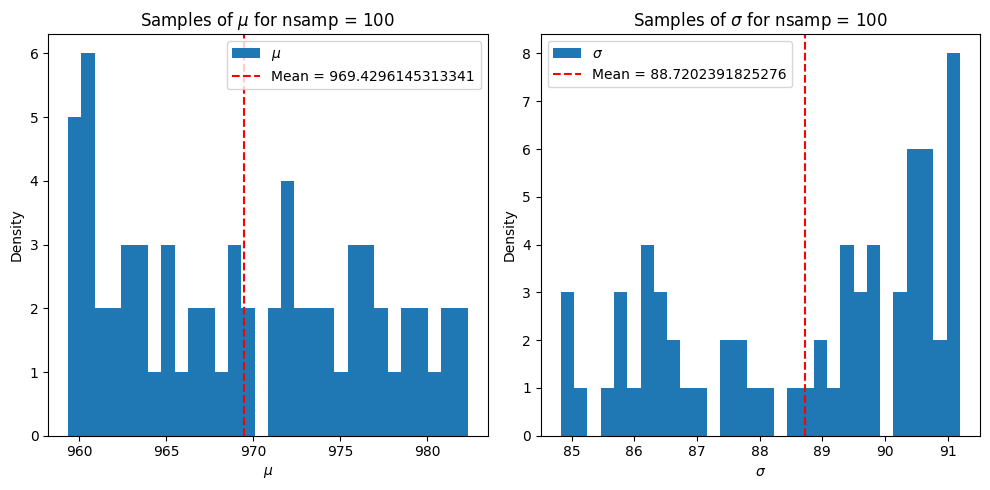



Posterior Distribution for nsamp = 1000



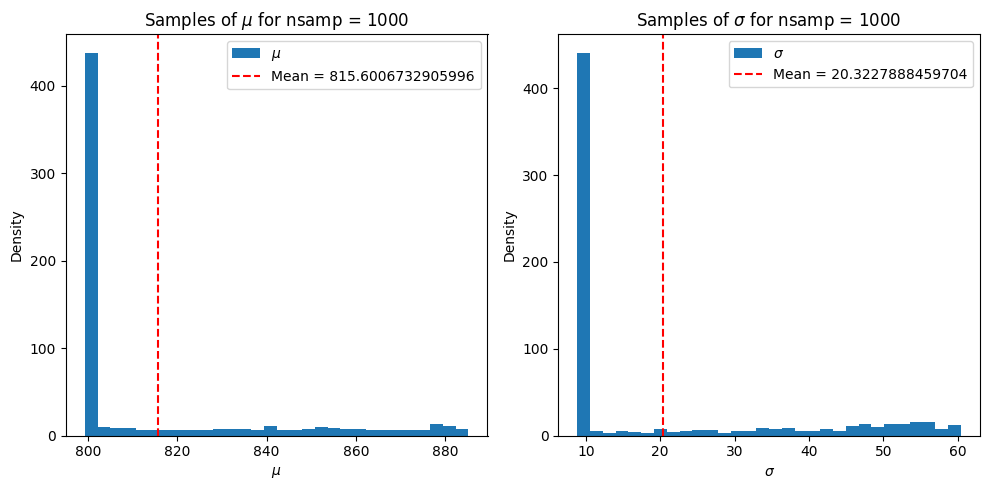



Posterior Distribution for nsamp = 6000



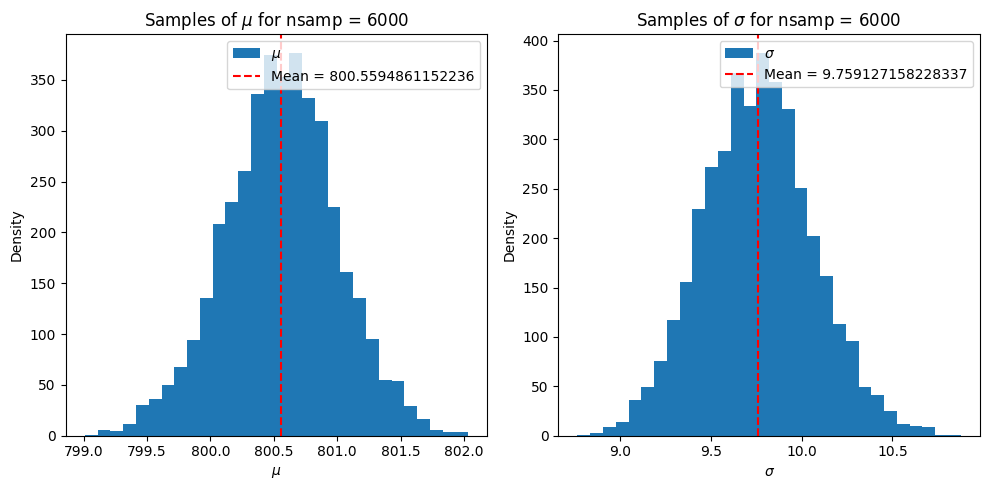



Following can be infered from the graphs - 

(1). For Large values of 'nsamp = 6000', Posterior become more accurate and less steep.
(2). For samples around same order 'nsamp = 1000, 6000' mean value remains closer to each other.
(3). For smaller values of 'nsamp = 100' values are quite random, as major samples are removed through 'nburn'. Also, one cannot comment on 'mean or sd' values of the posterior through very small sample.

Exercise (2.3).

Posterior Distribution for step = 0.001



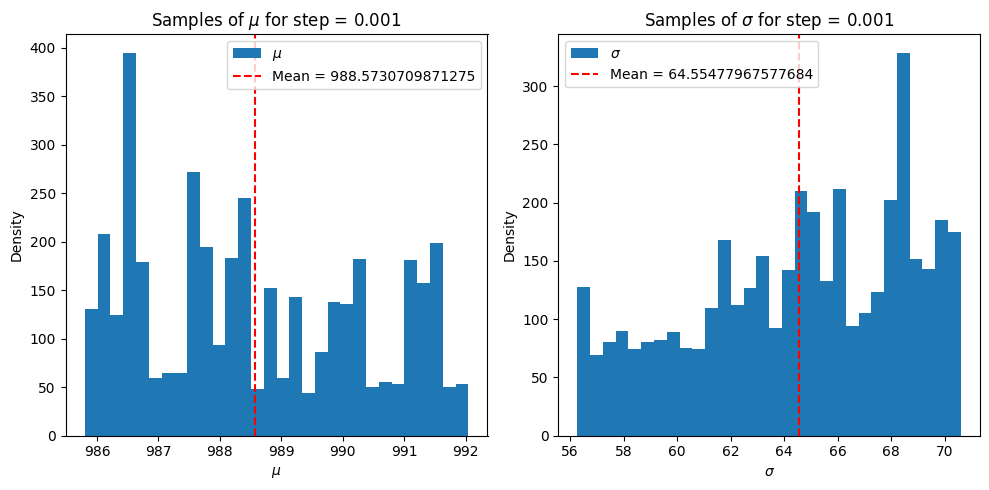



Posterior Distribution for step = 0.005



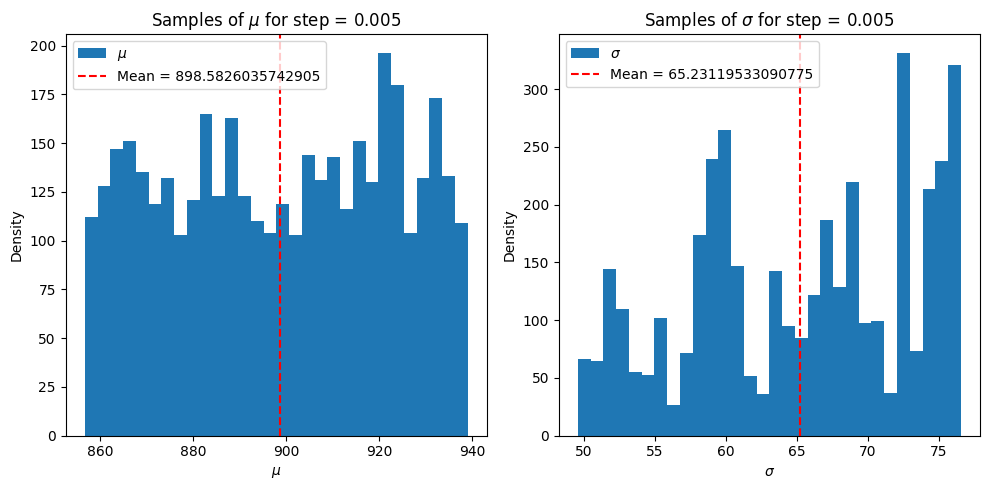



Posterior Distribution for step = 0.02



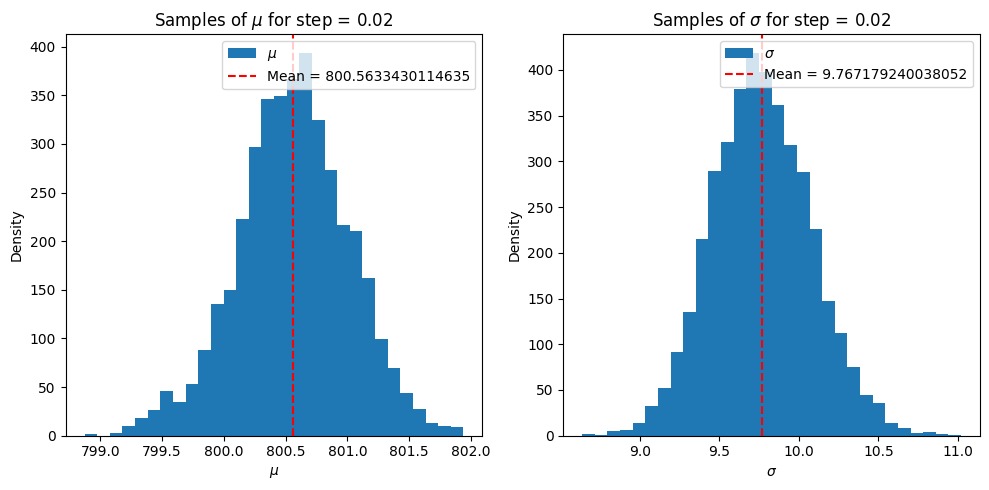



By comparing step-size we get - 

(1). Very Small step-size results to sample in the range of those obtained from smaller nsamp.
(2). Significantly large step-size (=0.2) results to sample in the range of those obtained from larger nsamp.
(3). With increasing step-size, the mean of the distribution also shifts towards the left for mu_samples, but doesn't occur exactly the same for sigma_samples.
(4). For step = 0.001, 0.005, samples traverse as a straight line, but for step = 0.2, samples traverse in a range of values. This can be understood through its 'Treace Plot'.

Exercise (2.4).

- With increasing step_size samples for mu_samples become less steep and their mean shifts towards left. But for sigma_samples from 0.001 -> 0.005 it becomes more steep and mean increases.
Posterior Distribution for step = 0.001



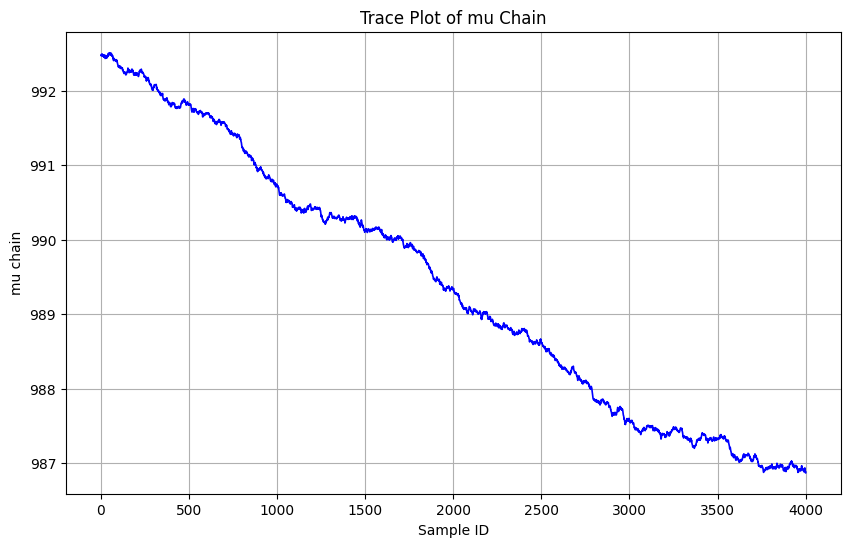

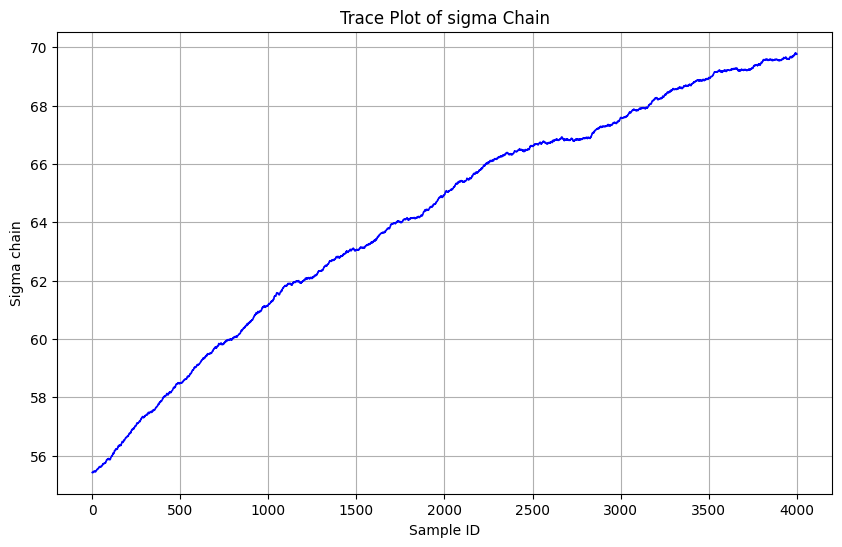



Posterior Distribution for step = 0.005



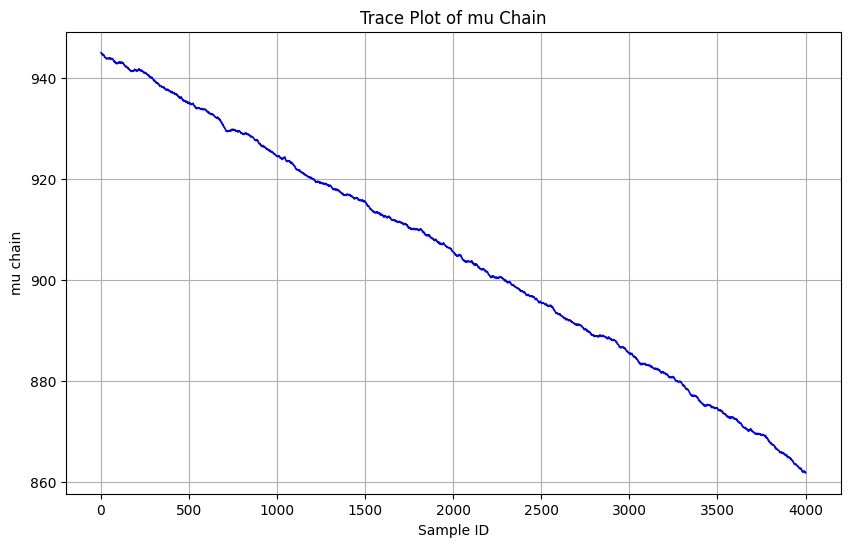

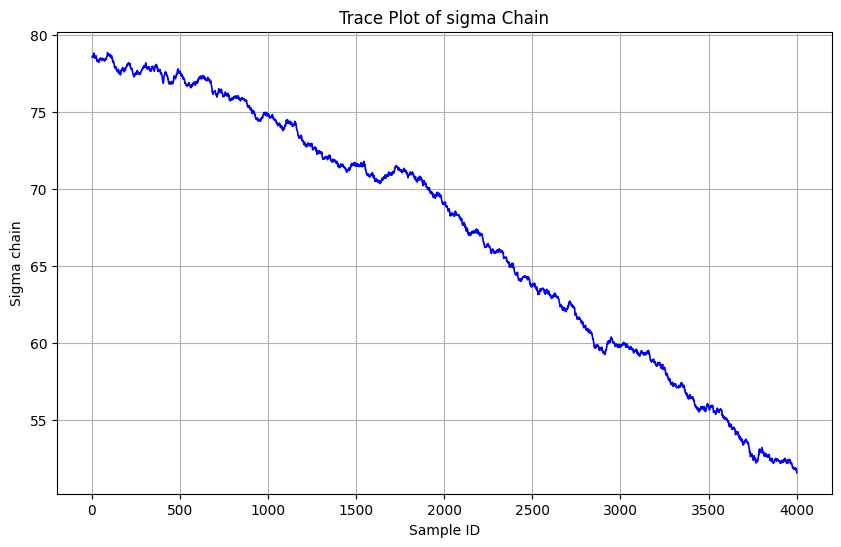



Posterior Distribution for step = 0.02



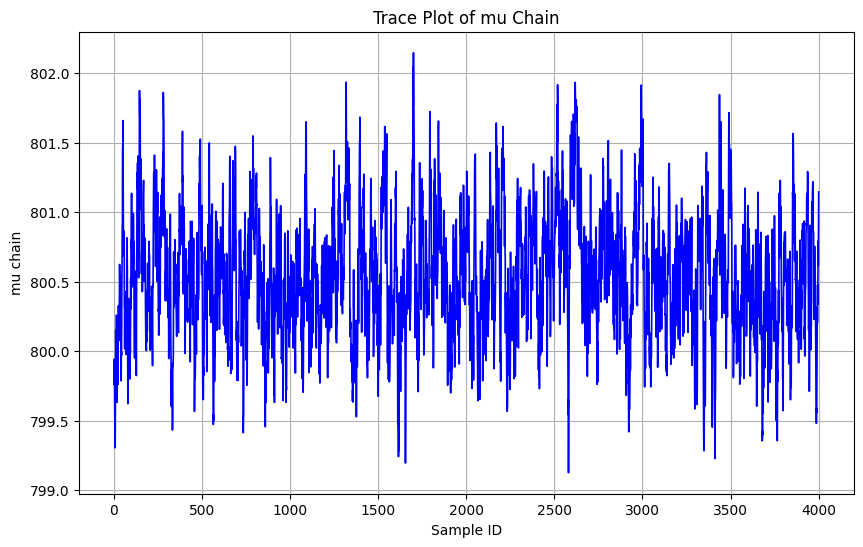

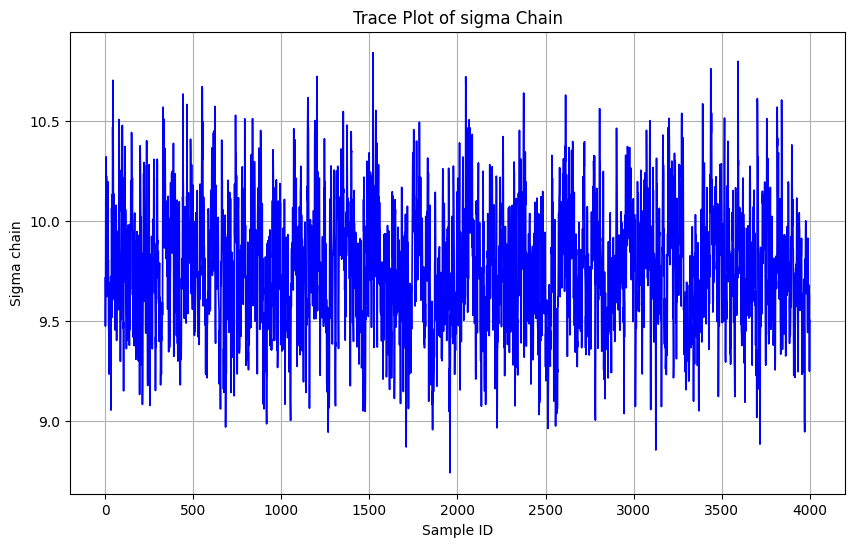




Exercise (2.5).

Posterior Distribution for m = 400, s = 5



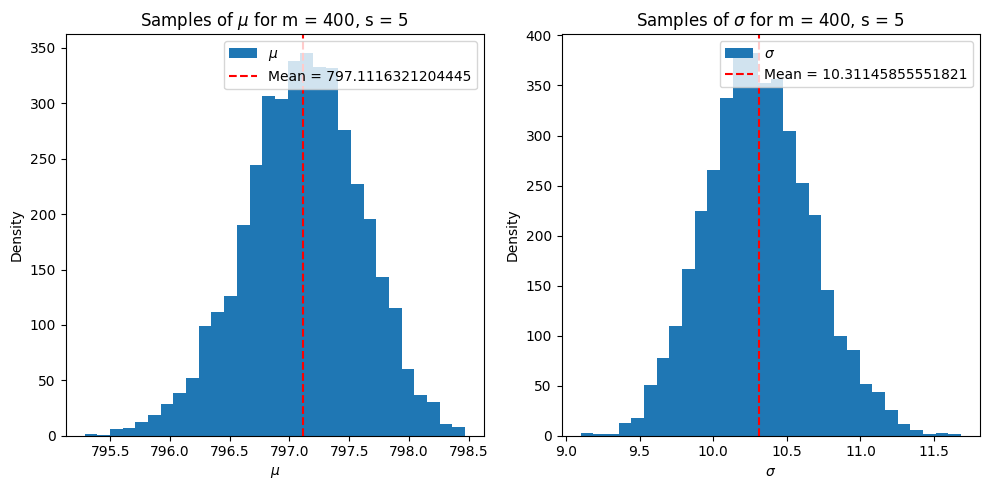



Posterior Distribution for m = 400, s = 20



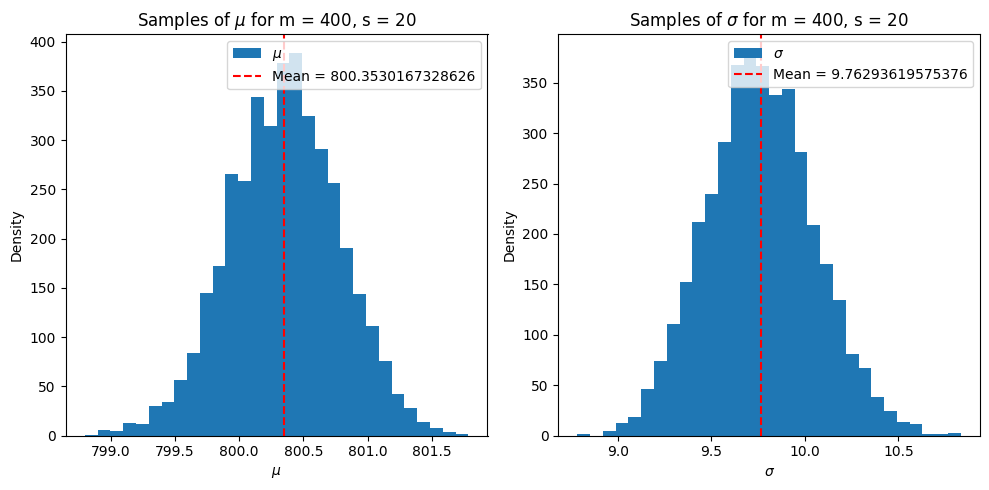



Posterior Distribution for m = 1000, s = 5



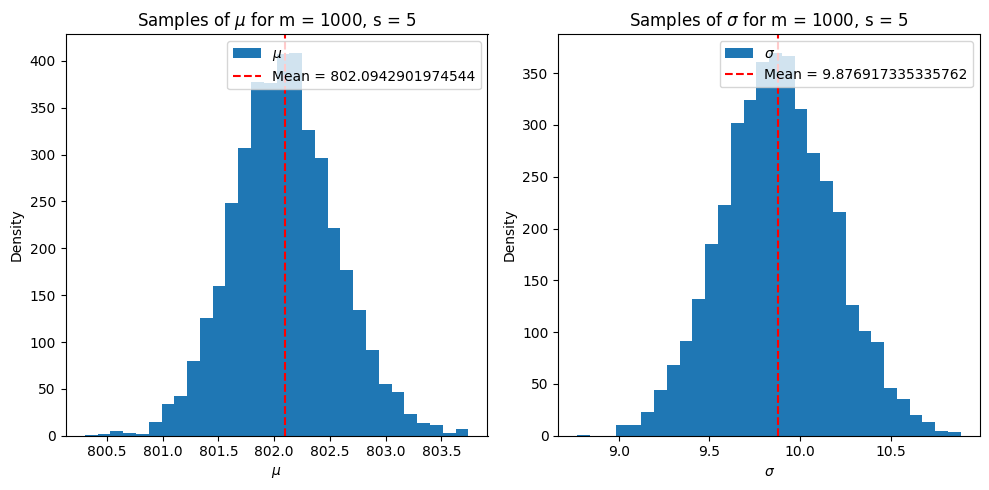



Posterior Distribution for m = 1000, s = 20



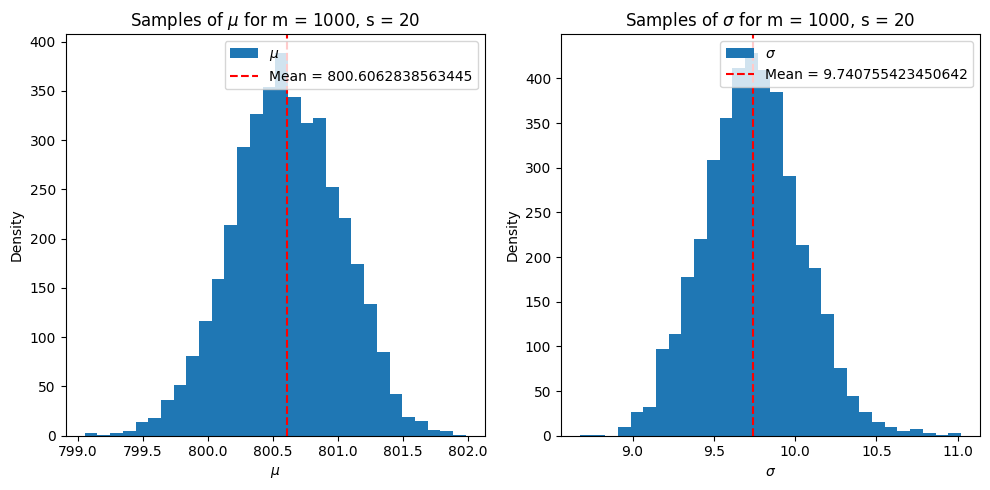



Posterior Distribution for m = 1000, s = 100



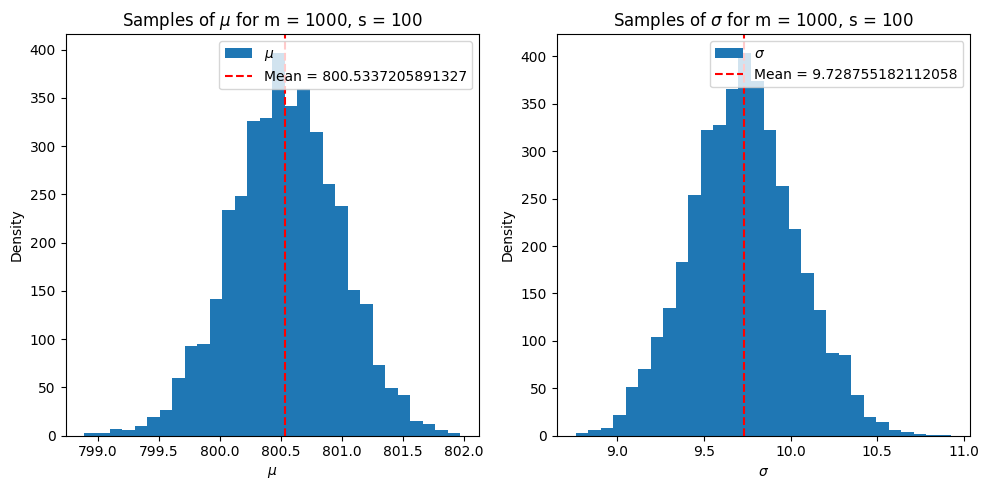



(1). For small values of 'm', mean of the posterior will be a little more away from the actual mean because it will add bias to the prior. Although, the difference is not large.
(2). For small values of 's', the spread will be less. Hence, sharp peaks.


In [16]:
print("Exercise (2.1).\n")

true_mu = 800
true_sigma = 100

y = np.random.normal(true_mu, np.sqrt(true_sigma), 500)

def gradient(mu, sigma, y, n, m, s, a, b):
    grad_mu = (((n*mu) - np.sum(y))/(sigma**2)) + ((mu - m)/(s**2))
    grad_sigma = (n/sigma) - (np.sum((y - mu)**2)/(sigma**3)) + ((sigma - a)/(b**2))
    return np.array([grad_mu, grad_sigma])

def V(mu, sigma, y, n, m, s, a, b):
    nlpd = -(np.sum(norm.logpdf(y, mu, sigma)) + norm.logpdf(mu, m, s) + norm.logpdf(sigma, a, b))
    return nlpd

def HMC(y, n, m, s, a, b, step, L, initial_q, nsamp, nburn):

    mu_samples = np.empty(nsamp)
    sigma_samples = np.empty(nsamp)

    reject = 0

    mu_samples[0] = initial_q[0]
    sigma_samples[0] = initial_q[1]

    i = 0
    while i < nsamp - 1:
        q = np.array([mu_samples[i], sigma_samples[i]])
        p = np.random.normal(0, 1, size=len(q))

        current_q = q.copy()
        current_p = p.copy()

        current_V = V(current_q[0], current_q[1], y, n, m, s, a, b)
        current_T = np.sum(current_p**2)/2

        for l in range(L):
            p -= ((step/2)*gradient(q[0], q[1], y, n, m, s, a, b))
            q += (step*p)
            p -= ((step/2)*gradient(q[0], q[1], y, n, m, s, a, b))

        proposed_q = q
        proposed_p = p

        proposed_V = V(proposed_q[0], proposed_q[1], y, n, m, s, a, b)
        proposed_T = np.sum(proposed_p**2)/2

        delta_energy = (current_V + current_T) - (proposed_V + proposed_T)

        if(delta_energy < 0.):
          mu_samples[i+1] = proposed_q[0]
          sigma_samples[i+1] = proposed_q[1]
          i += 1

        else:
          if(delta_energy > 100):
            accept_prob = 1
          else:
            accept_prob = min(1, np.exp(delta_energy))

          if(accept_prob > np.random.uniform(0,1)):
            mu_samples[i+1] = proposed_q[0]
            sigma_samples[i+1] = proposed_q[1]
            i += 1
          else:
            reject += 1

    posteriors = pd.DataFrame({'mu_samples': mu_samples[nburn:], 'sigma_samples': sigma_samples[nburn:]})
    posteriors['sample_id'] = np.arange(1, len(posteriors) + 1)

    return posteriors

n = len(y)
m = 1000
s = 100
a = 10
b = 2
step = 0.02
L = 12
initial_q = [1000, 11]
nburn = 2000

posteriors = HMC(y, n, m, s, a, b, step, L, initial_q, 6000, nburn)

mean_mu = np.mean(posteriors['mu_samples'])
mean_sigma = np.mean(posteriors['sigma_samples'])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(posteriors['mu_samples'], bins=30, label='$\\mu$')
axes[0].axvline(x=mean_mu, color='r', linestyle='--', label=f'Mean = {mean_mu}')
axes[0].set_xlabel('$\\mu$')
axes[0].set_ylabel('Density')
axes[0].set_title('Samples of $\\mu$')
axes[0].legend()

axes[1].hist(posteriors['sigma_samples'], bins=30, label='$\\sigma$')
axes[1].axvline(x=mean_sigma, color='r', linestyle='--', label=f'Mean = {mean_sigma}')
axes[1].set_xlabel('$\\sigma$')
axes[1].set_ylabel('Density')
axes[1].set_title('Samples of $\\sigma$')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nExercise (2.2).\n")

nsamp_ = [100, 1000, 6000]

for nsamp in nsamp_:
  posteriors_ = HMC(y, n, m, s, a, b, step, L, initial_q, nsamp, nsamp//3)
  print(f"Posterior Distribution for nsamp = {nsamp}\n")
  mean_mu = np.mean(posteriors_['mu_samples'])
  mean_sigma = np.mean(posteriors_['sigma_samples'])
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].hist(posteriors_['mu_samples'], bins=30, label='$\\mu$')
  axes[0].axvline(x=mean_mu, color='r', linestyle='--', label=f'Mean = {mean_mu}')
  axes[0].set_xlabel('$\\mu$')
  axes[0].set_ylabel('Density')
  axes[0].set_title(f'Samples of $\\mu$ for nsamp = {nsamp}')
  axes[0].legend()

  axes[1].hist(posteriors_['sigma_samples'], bins=30, label='$\\sigma$')
  axes[1].axvline(x=mean_sigma, color='r', linestyle='--', label=f'Mean = {mean_sigma}')
  axes[1].set_xlabel('$\\sigma$')
  axes[1].set_ylabel('Density')
  axes[1].set_title(f'Samples of $\\sigma$ for nsamp = {nsamp}')
  axes[1].legend()

  plt.tight_layout()
  plt.show()
  print("\n")

print("Following can be infered from the graphs - \n")
print("(1). For Large values of 'nsamp = 6000', Posterior become more accurate and less steep.")
print("(2). For samples around same order 'nsamp = 1000, 6000' mean value remains closer to each other.")
print("(3). For smaller values of 'nsamp = 100' values are quite random, as major samples are removed through 'nburn'. Also, one cannot comment on 'mean or sd' values of the posterior through very small sample.")

print("\nExercise (2.3).\n")
step_ = [0.001, 0.005, 0.02]

for step in step_:
  posteriors_ = HMC(y, n, m, s, a, b, step, L, initial_q, 6000, nburn)
  print(f"Posterior Distribution for step = {step}\n")
  mean_mu = np.mean(posteriors_['mu_samples'])
  mean_sigma = np.mean(posteriors_['sigma_samples'])
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].hist(posteriors_['mu_samples'], bins=30, label='$\\mu$')
  axes[0].axvline(x=mean_mu, color='r', linestyle='--', label=f'Mean = {mean_mu}')
  axes[0].set_xlabel('$\\mu$')
  axes[0].set_ylabel('Density')
  axes[0].set_title(f'Samples of $\\mu$ for step = {step}')
  axes[0].legend()
  axes[1].hist(posteriors_['sigma_samples'], bins=30, label='$\\sigma$')
  axes[1].axvline(x=mean_sigma, color='r', linestyle='--', label=f'Mean = {mean_sigma}')
  axes[1].set_xlabel('$\\sigma$')
  axes[1].set_ylabel('Density')
  axes[1].set_title(f'Samples of $\\sigma$ for step = {step}')
  axes[1].legend()
  plt.tight_layout()
  plt.show()
  print("\n")

print("By comparing step-size we get - \n")
print("(1). Very Small step-size results to sample in the range of those obtained from smaller nsamp.")
print("(2). Significantly large step-size (=0.2) results to sample in the range of those obtained from larger nsamp.")
print("(3). With increasing step-size, the mean of the distribution also shifts towards the left for mu_samples, but doesn't occur exactly the same for sigma_samples.")
print("(4). For step = 0.001, 0.005, samples traverse as a straight line, but for step = 0.2, samples traverse in a range of values. This can be understood through its 'Treace Plot'.")

print("\nExercise (2.4).\n")

print("- With increasing step_size samples for mu_samples become less steep and their mean shifts towards left. But for sigma_samples from 0.001 -> 0.005 it becomes more steep and mean increases.")

import seaborn as sns

step_ = [0.001, 0.005, 0.02]

for step in step_:
  posteriors_ = HMC(y, n, m, s, a, b, step, L, initial_q, 6000, nburn)
  print(f"Posterior Distribution for step = {step}\n")
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=posteriors_, x='sample_id', y='mu_samples', color='blue', linewidth=1.2)
  plt.xlabel("Sample ID")
  plt.ylabel("mu chain")
  plt.title("Trace Plot of mu Chain")
  plt.grid(True)
  plt.show()
  print("\n")
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=posteriors_, x='sample_id', y='sigma_samples', color='blue', linewidth=1.2)
  plt.xlabel("Sample ID")
  plt.ylabel("Sigma chain")
  plt.title("Trace Plot of sigma Chain")
  plt.grid(True)
  plt.show()
  print("\n")

print("\nExercise (2.5).\n")

m_samples = [400, 400, 1000, 1000, 1000]
s_samples = [5, 20, 5, 20, 100]

for i in range(5):
  y_posterior = HMC(y, n, m_samples[i], s_samples[i], a, b, step, L, initial_q, 6000, nburn)
  print(f"Posterior Distribution for m = {m_samples[i]}, s = {s_samples[i]}\n")
  mean_mu = np.mean(y_posterior['mu_samples'])
  mean_sigma = np.mean(y_posterior['sigma_samples'])
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].hist(y_posterior['mu_samples'], bins=30, label='$\\mu$')
  axes[0].axvline(x=mean_mu, color='r', linestyle='--', label=f'Mean = {mean_mu}')
  axes[0].set_xlabel('$\\mu$')
  axes[0].set_ylabel('Density')
  axes[0].set_title(f'Samples of $\\mu$ for m = {m_samples[i]}, s = {s_samples[i]}')
  axes[0].legend()
  axes[1].hist(y_posterior['sigma_samples'], bins=30, label='$\\sigma$')
  axes[1].axvline(x=mean_sigma, color='r', linestyle='--', label=f'Mean = {mean_sigma}')
  axes[1].set_xlabel('$\\sigma$')
  axes[1].set_ylabel('Density')
  axes[1].set_title(f'Samples of $\\sigma$ for m = {m_samples[i]}, s = {s_samples[i]}')
  axes[1].legend()
  plt.tight_layout()
  plt.show()
  print("\n")

print("(1). For small values of 'm', mean of the posterior will be a little more away from the actual mean because it will add bias to the prior. Although, the difference is not large.")
print("(2). For small values of 's', the spread will be less. Hence, sharp peaks.")
